In [35]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Open_Spaces csv import

csv_path = 'data/VPA_Open_Space.csv'
read_csv = pd.read_csv(csv_path)
information_df = pd.DataFrame(read_csv)

In [37]:
# Filter for public open spaces
information_df_parks_df = information_df.loc[(information_df['OS_TYPE'] == 'Public open space')]

In [38]:
# Create a bucket and loop through all the LGA names in the dataframe and store them
lga_list = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False).index)
lga_list

lga_bucket = []

for i in range(len(lga_list)):
    lga_bucket.append(str(lga_list['LGA'][i].title()))

In [40]:
# Create a bucket and loop through all the park counts in the dataframe and store them
lga_park_count = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False))
lga_park_count = lga_park_count['PARK_NAME'].reset_index('LGA')
lga_park_count

park_count = []

for i in range(len(lga_park_count)):
    park_count.append(int(lga_park_count['PARK_NAME'][i]))

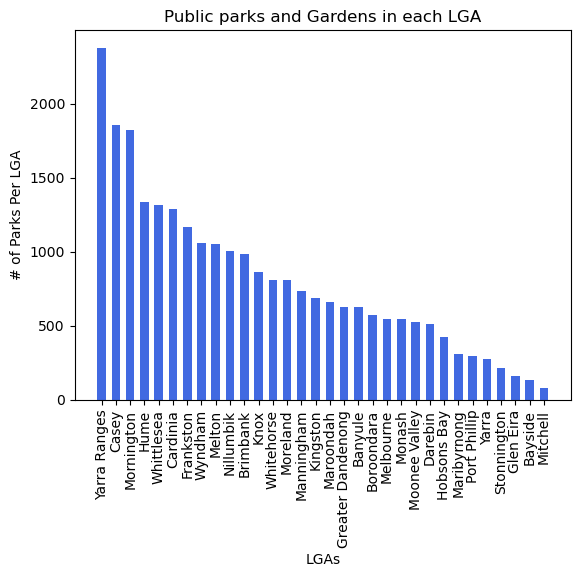

In [41]:
# Quick representation as a bar chart to visualise the number of open spaces per LGA

x_axis = np.arange(len(lga_bucket))

plt.bar(x_axis, park_count, color="royalblue", align="center", width = 0.6)
tick_locations = [value for value in x_axis]
tick_locations
plt.xticks(tick_locations, lga_bucket, rotation = 90)
plt.xlabel('LGAs')
plt.ylabel('# of Parks Per LGA')
plt.title('Public parks and Gardens in each LGA')

plt.show()

In [42]:
# Create a DataFrame to hold both sets of information, LGA & Open Space counts & sort them alphabetically.
lga_park_count_df = pd.DataFrame({"Local Government Area" : lga_bucket, 
                                  "Public Open Spaces" : park_count})

lga_park_count_df.sort_values(by = 'Local Government Area', ascending = True)

,Local Government Area,Public Open Spaces
18,Banyule,625
30,Bayside,131
19,Boroondara,576
10,Brimbank,986
5,Cardinia,1287
1,Casey,1853
23,Darebin,513
6,Frankston,1166
29,Glen Eira,160
17,Greater Dandenong,626


In [43]:
# Create a list of columns names to use when importing the next file
column_names = ['LGA code', 'Local Government Area', '2021 Population', 
                '2022 Population', 'Population Change 21-22', '% Change 21-22', 'Area (km2)', 
                'Population Density (persons/km2)'
            ]

In [44]:

# Import the excel file and use the column_names bucket to use as the column names.
lga_information_path = pd.read_excel('data/LGA_ABS_data_21_22.xlsx', 
                                     sheet_name = 2, 
                                     header = 7,
                                     names = column_names,
                                     usecols = 'A,B,C,D,F,G,M,N',
                                     skiprows = 1,
                                     na_values = 0)
lga_information = pd.DataFrame(lga_information_path)
lga_information

,LGA code,Local Government Area,2021 Population,2022 Population,Population Change 21-22,% Change 21-22,Area (km2),Population Density (persons/km2)
0,20110,Alpine,13166.0,13187.0,21.0,0.2,4788.2,2.8
1,20260,Ararat,11827.0,11754.0,-73.0,-0.6,4211.1,2.8
2,20570,Ballarat,113504.0,115951.0,2447.0,2.2,739.0,156.9
3,20660,Banyule,127370.0,127348.0,-22.0,NaN,62.5,2036.3
4,20740,Bass Coast,40675.0,41798.0,1123.0,2.8,865.8,48.3
...,...,...,...,...,...,...,...,...
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,"Source: Regional population, 2021-22",NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Any NaN values in the population change % replaced by zeroes

work_bucket = []
change_search = range(len(lga_information['% Change 21-22']))

for i in change_search:
    
    work_bucket.append(lga_information['% Change 21-22'][i])

work_bucket = pd.Series(work_bucket, dtype=object).fillna(0).tolist()

lga_information['% Change 21-22'] = work_bucket
    

In [46]:
lga_information

,LGA code,Local Government Area,2021 Population,2022 Population,Population Change 21-22,% Change 21-22,Area (km2),Population Density (persons/km2)
0,20110,Alpine,13166.0,13187.0,21.0,0.2,4788.2,2.8
1,20260,Ararat,11827.0,11754.0,-73.0,-0.6,4211.1,2.8
2,20570,Ballarat,113504.0,115951.0,2447.0,2.2,739.0,156.9
3,20660,Banyule,127370.0,127348.0,-22.0,0.0,62.5,2036.3
4,20740,Bass Coast,40675.0,41798.0,1123.0,2.8,865.8,48.3
...,...,...,...,...,...,...,...,...
83,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
85,"Source: Regional population, 2021-22",NaN,NaN,NaN,NaN,0.0,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [47]:
# Filter information by the LGA list we've gotten from the first dataset we've imported using the .isin
lga_filtered = lga_information.loc[lga_information['Local Government Area'].isin(lga_bucket)]
lga_filtered = lga_filtered.reset_index(drop = True)

In [48]:
# Merge the information into one DF using Merge on the LGA name & sort data alphabetically
merged_vic_data_df = pd.merge(lga_filtered, lga_park_count_df, how = 'inner', on = 'Local Government Area')
merged_vic_data_df.to_csv('data/merged_vic_data.csv')
merged_vic_data_df.sort_values(by = ['Local Government Area'] ,ascending = True)

,LGA code,Local Government Area,2021 Population,2022 Population,Population Change 21-22,% Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces
0,20660,Banyule,127370.0,127348.0,-22.0,0.0,62.5,2036.3,625
1,20910,Bayside,102328.0,102177.0,-151.0,-0.1,37.2,2745.9,131
2,21110,Boroondara,169789.0,169500.0,-289.0,-0.2,60.2,2816.7,576
3,21180,Brimbank,196631.0,193256.0,-3375.0,-1.7,123.4,1566.1,986
4,21450,Cardinia,119573.0,123104.0,3531.0,3.0,1282.6,96.0,1287
5,21610,Casey,369558.0,378831.0,9273.0,2.5,409.4,925.3,1853
6,21890,Darebin,150296.0,150483.0,187.0,0.1,53.5,2814.3,513
7,22170,Frankston,140824.0,141078.0,254.0,0.2,129.6,1088.6,1166
8,22310,Glen Eira,150638.0,151694.0,1056.0,0.7,38.7,3920.7,160
9,22670,Greater Dandenong,160100.0,159151.0,-949.0,-0.6,129.5,1228.5,626


In [49]:
merged_vic_data_df.head()

,LGA code,Local Government Area,2021 Population,2022 Population,Population Change 21-22,% Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces
0,20660,Banyule,127370.0,127348.0,-22.0,0.0,62.5,2036.3,625
1,20910,Bayside,102328.0,102177.0,-151.0,-0.1,37.2,2745.9,131
2,21110,Boroondara,169789.0,169500.0,-289.0,-0.2,60.2,2816.7,576
3,21180,Brimbank,196631.0,193256.0,-3375.0,-1.7,123.4,1566.1,986
4,21450,Cardinia,119573.0,123104.0,3531.0,3.0,1282.6,96.0,1287


In [50]:
# Imprt the school information dataset.
school_csv_path = 'data/dv309_schoollocations2021.csv'

school_read_csv = pd.read_csv(school_csv_path, encoding = 'cp1252')

school_count_df = pd.DataFrame(school_read_csv)

In [51]:
# Replace unwanted string characters in the LGA Name column to allow us to merge the data later

school_count_df['LGA_Name'] = school_count_df['LGA_Name'].str.replace(r" \(.*\)", "")

c:\Users\anups\anaconda3\envs\dev0\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
# Filter the schools dataset by only the LGAs in the existing dataframe
school_count_df_filtered = school_count_df.loc[school_count_df['LGA_Name'].isin(merged_vic_data_df['Local Government Area'])]

In [53]:
# Group by the LGA and school type to get all the LGa schools information to merge with dataframe later
by_school_type_df = school_count_df_filtered.groupby(['LGA_Name', 'School_Type'])['SCHOOL_NO'].count()
school_type_df = pd.DataFrame(by_school_type_df)
school_type_df

SCHOOL_NO
LGA_Name     School_Type           
Banyule      Pri/Sec              3
             Primary             29
             Secondary            8
             Special              3
Bayside      Pri/Sec              3
...                             ...
Yarra        Special              1
Yarra Ranges Pri/Sec              8
             Primary             58
             Secondary           10
             Special              4

[130 rows x 1 columns]

In [54]:
# Drop all the information into the table to use .loc to slice.
school_type_df = school_type_df.reset_index(inplace = False)
school_type_df

,LGA_Name,School_Type,SCHOOL_NO
0,Banyule,Pri/Sec,3
1,Banyule,Primary,29
2,Banyule,Secondary,8
3,Banyule,Special,3
4,Bayside,Pri/Sec,3
...,...,...,...
125,Yarra,Special,1
126,Yarra Ranges,Pri/Sec,8
127,Yarra Ranges,Primary,58
128,Yarra Ranges,Secondary,10


In [55]:
# Loop through to find all the different types of schools

school_range = range(len(school_type_df['School_Type'].unique()))

school_types = []

for i in school_range:
    school_types.append(school_type_df['School_Type'].unique()[i])

In [56]:
# for each school type create a dictionary within a list to hold the information. Can call the list by the dictionary index.
school_search_len = range(len(school_types))
dictionary_list = [{} for i in school_search_len]
dictionary_list

[{}, {}, {}, {}, {}]

In [57]:
# Loop through each school type and get the information for each LGA and append it to the list of dictionaries
school_search_len = range(len(school_types))

counter = 0

for i in school_search_len:
    search_df = school_type_df.loc[school_type_df['School_Type'] == school_types[i]].reset_index(drop = True)
    for j in range(len(search_df['LGA_Name'])):
        dictionary_list[counter][search_df['LGA_Name'][j]] = search_df['SCHOOL_NO'][j]
    counter += 1

In [58]:
# Define variables which hold the information for each school type

primary_secondary_counts = dictionary_list[0]
primary_counts = dictionary_list[1]
secondary_counts = dictionary_list[2]
special_counts = dictionary_list[3]
language_counts = dictionary_list[4]

In [59]:
# For each school type go through and make a DF of each LGA & count of school

prisec_df = pd.Series(primary_secondary_counts, name = 'Primary/Secondary Schools')
prisec_df = pd.DataFrame(prisec_df).reset_index(drop = False)
prisec_df = prisec_df.rename(columns= {'index' : 'Local Government Area'})
prisec_df['Primary/Secondary Schools'] = prisec_df['Primary/Secondary Schools'].astype(int)

In [60]:
# For each school type go through and make a DF of each LGA & count of school

pri_df = pd.Series(primary_counts, name = 'Primary Schools')
pri_df = pd.DataFrame(pri_df).reset_index(drop = False)
pri_df = pri_df.rename(columns= {'index' : 'Local Government Area'})
pri_df['Primary Schools'] = pri_df['Primary Schools'].astype(int)

In [61]:

# For each school type go through and make a DF of each LGA & count of school

sec_df = pd.Series(secondary_counts, name = 'Secondary Schools')
sec_df = pd.DataFrame(sec_df).reset_index(drop = False)
sec_df = sec_df.rename(columns= {'index' : 'Local Government Area'})
sec_df['Secondary Schools'] = sec_df['Secondary Schools'].astype(int)

In [62]:
# For each school type go through and make a DF of each LGA & count of school

spec_df = pd.Series(special_counts, name = 'Special Schools')
spec_df = pd.DataFrame(spec_df).reset_index(drop = False)
spec_df = spec_df.rename(columns= {'index' : 'Local Government Area'})
spec_df['Special Schools'] = spec_df['Special Schools'].astype(int)

In [63]:
# For each school type go through and make a DF of each LGA & count of school

lang_df = pd.Series(language_counts, name = 'Language Schools')
lang_df = pd.DataFrame(lang_df).reset_index(drop = False)
lang_df = lang_df.rename(columns= {'index' : 'Local Government Area'})
lang_df['Language Schools'] = lang_df['Language Schools'].astype(int)

In [64]:
# Merge the school information into the combined DF
merged_vic_data_df = pd.merge(merged_vic_data_df, prisec_df, how = 'outer', on = 'Local Government Area')
merged_vic_data_df = pd.merge(merged_vic_data_df, pri_df, how = 'outer', on = 'Local Government Area')
merged_vic_data_df = pd.merge(merged_vic_data_df, sec_df, how = 'outer', on = 'Local Government Area')
merged_vic_data_df = pd.merge(merged_vic_data_df, spec_df, how = 'outer', on = 'Local Government Area')
merged_vic_data_df = pd.merge(merged_vic_data_df, lang_df, how = 'outer', on = 'Local Government Area')

In [65]:
# For some reason when we triedconverting from Float to int, it rolled integer counts which were zero as the highest negative integer. This code converts the nan values into zeros without the integer rollback issue

search_columns = ['Primary/Secondary Schools', 'Primary Schools', 'Secondary Schools', 'Special Schools', 'Language Schools']

for i in search_columns:
    arr = np.array(merged_vic_data_df[i])
    arr = np.nan_to_num(arr, nan=0, posinf=None, neginf=None)  # Replace infinite values with a specific value
    arr = arr.astype(int)  # Convert to integearr
    merged_vic_data_df[i] = arr


In [66]:
# Get the school count totals into a list. The benefit of a list here is we can double check against the original df using .loc and .counts to slice by LGA and school type.

total_schools_bucket = {}
column_list = ['Primary/Secondary Schools', 'Primary Schools', 'Secondary Schools', 'Special Schools', 'Language Schools']
counter = 0

search_range = range(len(merged_vic_data_df['Primary/Secondary Schools']))

for i in search_range:
    tally = merged_vic_data_df['Primary/Secondary Schools'][i] + merged_vic_data_df['Primary Schools'][i] + merged_vic_data_df['Secondary Schools'][i] + merged_vic_data_df['Special Schools'][i] + merged_vic_data_df['Language Schools'][i]
    total_schools_bucket[merged_vic_data_df['Local Government Area'][i]] = tally

# Turn the dictionary into a series with LGA as the index
total_schools_bucket_series = pd.Series(total_schools_bucket, index = merged_vic_data_df['Local Government Area'])

# Turn the series' values (which is the total school counts) into a new column in the merged data frame.
merged_vic_data_df['Total Schools'] = total_schools_bucket_series.values

In [67]:
merged_vic_data_df.to_excel('data/Complete_Dataset.xlsx')

In [68]:
merged_vic_data_df

,LGA code,Local Government Area,2021 Population,2022 Population,Population Change 21-22,% Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces,Primary/Secondary Schools,Primary Schools,Secondary Schools,Special Schools,Language Schools,Total Schools
0,20660,Banyule,127370.0,127348.0,-22.0,0.0,62.5,2036.3,625,3,29,8,3,0,43
1,20910,Bayside,102328.0,102177.0,-151.0,-0.1,37.2,2745.9,131,3,19,5,1,0,28
2,21110,Boroondara,169789.0,169500.0,-289.0,-0.2,60.2,2816.7,576,13,31,9,5,0,58
3,21180,Brimbank,196631.0,193256.0,-3375.0,-1.7,123.4,1566.1,986,1,45,10,3,0,59
4,21450,Cardinia,119573.0,123104.0,3531.0,3.0,1282.6,96.0,1287,3,28,6,1,0,38
5,21610,Casey,369558.0,378831.0,9273.0,2.5,409.4,925.3,1853,9,59,13,2,0,83
6,21890,Darebin,150296.0,150483.0,187.0,0.1,53.5,2814.3,513,5,30,7,4,0,46
7,22170,Frankston,140824.0,141078.0,254.0,0.2,129.6,1088.6,1166,2,28,8,3,0,41
8,22310,Glen Eira,150638.0,151694.0,1056.0,0.7,38.7,3920.7,160,10,21,6,2,0,39
9,22670,Greater Dandenong,160100.0,159151.0,-949.0,-0.6,129.5,1228.5,626,7,26,7,3,1,44
